In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
all_births = pd.read_csv('../data/births_combined.csv')

In [3]:
all_births.head()

,year,month,date_of_month,day_of_week,births
0,1994,1,1,6,8096
1,1994,1,2,7,7772
2,1994,1,3,1,10142
3,1994,1,4,2,11248
4,1994,1,5,3,11053


In [4]:
all_births.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7670 entries, 0 to 7669
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   year           7670 non-null   int64
 1   month          7670 non-null   int64
 2   date_of_month  7670 non-null   int64
 3   day_of_week    7670 non-null   int64
 4   births         7670 non-null   int64
dtypes: int64(5)
memory usage: 299.7 KB


In [5]:
#converting column from int64 to string in order to replace numerical values of days of the week into text values.
all_births['day_of_week'] = all_births['day_of_week'].astype(str)
all_births['month'] = all_births['month'].astype(str)

In [6]:
all_births.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7670 entries, 0 to 7669
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   year           7670 non-null   int64 
 1   month          7670 non-null   object
 2   date_of_month  7670 non-null   int64 
 3   day_of_week    7670 non-null   object
 4   births         7670 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 299.7+ KB


In [7]:
#replacing values
replaced_days = {
    "1": "Monday",
    "2": "Tuesday",
    "3": "Wednesday",
    "4": "Thursday",
    "5": "Friday",
    "6": "Saturday",
    "7": "Sunday"
}

In [8]:
all_births['day_of_week'] = all_births['day_of_week'].replace(replaced_days)

In [9]:
all_births.head(20)

,year,month,date_of_month,day_of_week,births
0,1994,1,1,Saturday,8096
1,1994,1,2,Sunday,7772
2,1994,1,3,Monday,10142
3,1994,1,4,Tuesday,11248
4,1994,1,5,Wednesday,11053
5,1994,1,6,Thursday,11406
6,1994,1,7,Friday,11251
7,1994,1,8,Saturday,8653
8,1994,1,9,Sunday,7910
9,1994,1,10,Monday,10498


In [10]:
avg_births_day = all_births.groupby('day_of_week')['births'].mean().reset_index()

In [11]:
avg_births_day.sort_values(by='births', ascending=False)

,day_of_week,births
5,Tuesday,12787.730839
6,Wednesday,12568.713504
4,Thursday,12503.460274
0,Friday,12304.196347
1,Monday,11562.583942
2,Saturday,8592.760949
3,Sunday,7610.330292


In [12]:
avg_births_day_sorted = avg_births_day.sort_values(by='births', ascending=False)

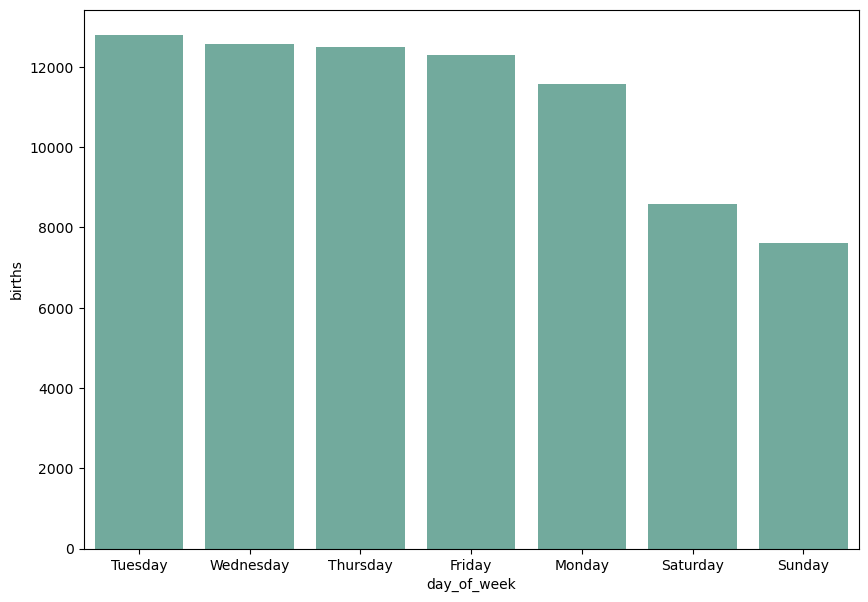

In [13]:
plt.figure(figsize=(10, 7))

sns.barplot(
    data=avg_births_day_sorted,
    x="day_of_week", 
    y="births",  
    color='#69b3a2');

In [14]:
replaced_months = {
    "1": "January",
    "2": "February",
    "3": "March",
    "4": "April",
    "5": "May",
    "6": "June",
    "7": "July",
    "8": "August",
    "9": "September",
    "10": "October",
    "11": "November",
    "12": "December"
}

In [15]:
all_births['month'] = all_births['month'].replace(replaced_months)

In [16]:
all_births.head()

,year,month,date_of_month,day_of_week,births
0,1994,January,1,Saturday,8096
1,1994,January,2,Sunday,7772
2,1994,January,3,Monday,10142
3,1994,January,4,Tuesday,11248
4,1994,January,5,Wednesday,11053


# Grouping average births per month

In [17]:
avg_births_month = all_births.groupby('month')['births'].mean().reset_index()

In [18]:
avg_births_month.sort_values(by='births', ascending=False)

,month,births
11,September,11763.966667
1,August,11668.082949
5,July,11521.958525
6,June,11266.776190
10,October,11158.351767
8,May,10983.943164
2,December,10942.006144
7,March,10939.996928
3,February,10939.745363
9,November,10880.730159


In [19]:
avg_births_month_sorted = avg_births_month.sort_values(by='births', ascending=False)

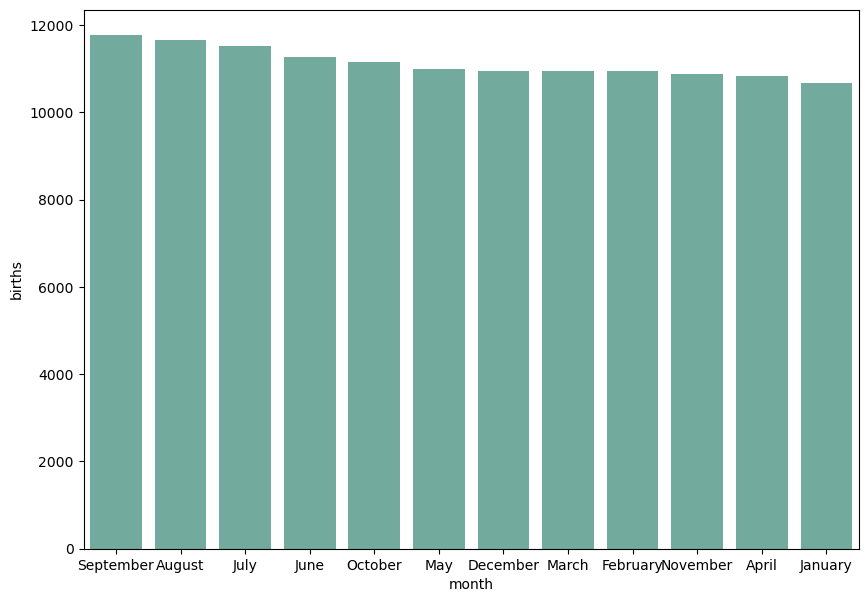

In [20]:
plt.figure(figsize=(10, 7))

sns.barplot(
    data=avg_births_month_sorted,
    x="month", 
    y="births",  
    color='#69b3a2');

# Finding values of September births

In [21]:
september_births = all_births[all_births['month'] == 'September']

In [22]:
september_births.sort_values(by='births', ascending=False)

,year,month,date_of_month,day_of_week,births
5730,2009,September,9,Wednesday,16081
4632,2006,September,7,Thursday,15454
4995,2007,September,5,Wednesday,15440
4631,2006,September,6,Wednesday,15391
4644,2006,September,19,Tuesday,15205
...,...,...,...,...,...
5727,2009,September,6,Sunday,7587
6091,2010,September,5,Sunday,7586
6112,2010,September,26,Sunday,7543
6462,2011,September,11,Sunday,7501


In [23]:
all_births[all_births['month']=='September'].nlargest(1, 'births')['month'].tolist()[0]

'September'

In [24]:
highest_births = all_births[all_births['month']=='September'].nlargest(1, 'births')['month'].tolist()[0]

In [25]:
all_births[all_births['month']==highest_births].sort_values(by='births', ascending=False)

,year,month,date_of_month,day_of_week,births
5730,2009,September,9,Wednesday,16081
4632,2006,September,7,Thursday,15454
4995,2007,September,5,Wednesday,15440
4631,2006,September,6,Wednesday,15391
4644,2006,September,19,Tuesday,15205
...,...,...,...,...,...
5727,2009,September,6,Sunday,7587
6091,2010,September,5,Sunday,7586
6112,2010,September,26,Sunday,7543
6462,2011,September,11,Sunday,7501


# Finding average births by year

In [26]:
avg_births_year = all_births.groupby('year')['births'].mean().reset_index()

In [27]:
avg_births_year

,year,births
0,1994,10829.498630
1,1995,10683.805479
2,1996,10632.497268
3,1997,10632.586301
4,1998,10798.775342
5,1999,10847.717808
6,2000,11089.655738
7,2001,11029.953425
8,2002,11018.427397
9,2003,11205.342466


In [82]:
avg_births_year_sorted = avg_births_year.sort_values(by='births', ascending=False)

In [83]:
avg_births_year_sorted

,year,births
13,2007,12002.147945
12,2006,11877.134247
14,2008,11777.969945
11,2005,11539.564384
15,2009,11482.167123
10,2004,11439.516393
9,2003,11205.342466
16,2010,11112.260274
6,2000,11089.655738
7,2001,11029.953425


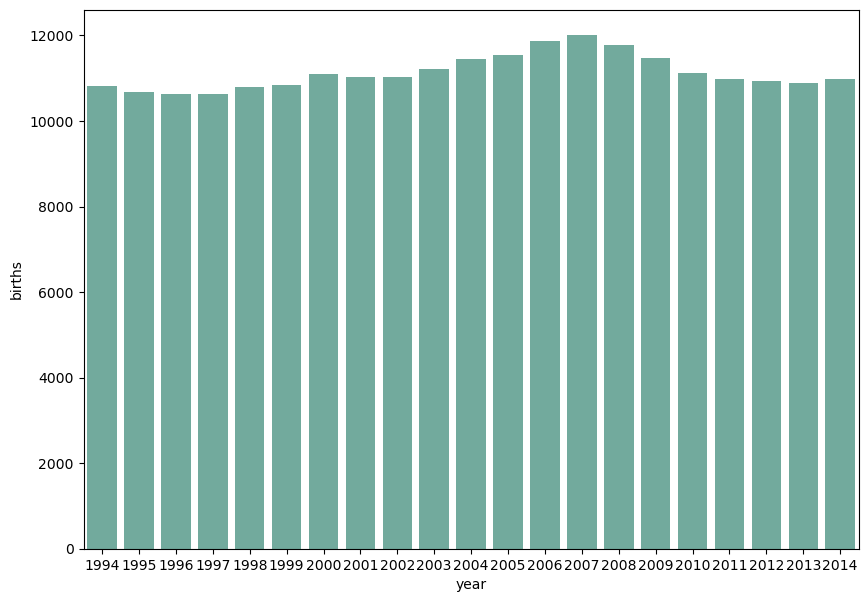

In [84]:
plt.figure(figsize=(10, 7))

sns.barplot(
    data=avg_births_year_sorted,
    x="year", 
    y="births",  
    color='#69b3a2');

# Finding total births per year

In [30]:
births_per_year = all_births.groupby('year')['births'].sum().reset_index()

In [31]:
births_per_year

,year,births
0,1994,3952767
1,1995,3899589
2,1996,3891494
3,1997,3880894
4,1998,3941553
5,1999,3959417
6,2000,4058814
7,2001,4025933
8,2002,4021726
9,2003,4089950


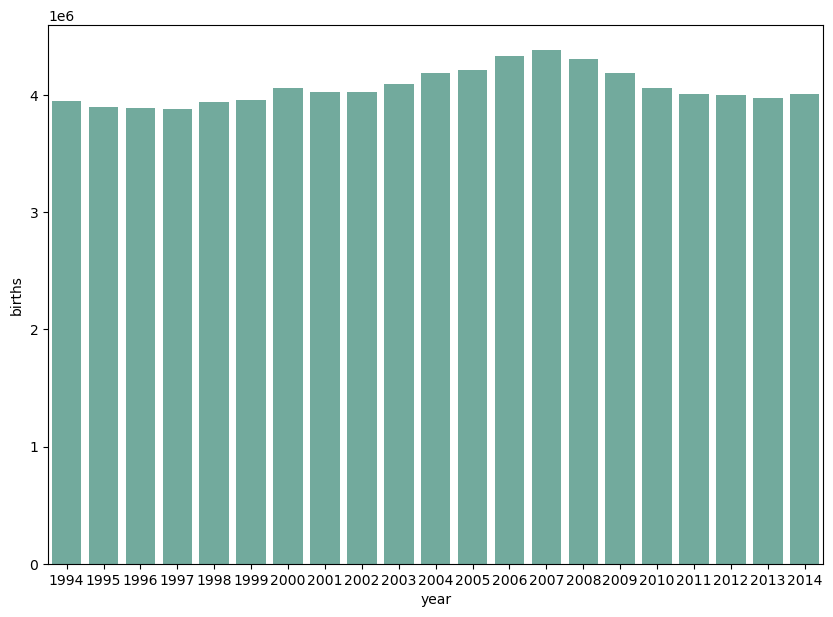

In [32]:
plt.figure(figsize=(10, 7))

sns.barplot(
    data=births_per_year,
    x="year", 
    y="births",  
    color='#69b3a2');

In [33]:
all_births.head()

,year,month,date_of_month,day_of_week,births
0,1994,January,1,Saturday,8096
1,1994,January,2,Sunday,7772
2,1994,January,3,Monday,10142
3,1994,January,4,Tuesday,11248
4,1994,January,5,Wednesday,11053


# Finding total births of dates of the month

In [34]:
births_on_day = all_births.groupby('date_of_month')['births'].sum().reset_index()

In [35]:
births_on_day

,date_of_month,births
0,1,2755187
1,2,2788038
2,3,2803237
3,4,2756282
4,5,2788696
5,6,2797080
6,7,2826460
7,8,2830509
8,9,2812697
9,10,2835319


In [36]:
births_on_day_sorted = births_on_day.sort_values(by='births', ascending=False)

In [37]:
births_on_day_sorted

,date_of_month,births
19,20,2854849
20,21,2851931
17,18,2846056
13,14,2845418
16,17,2845098
14,15,2841431
11,12,2836469
9,10,2835319
15,16,2833274
18,19,2830670


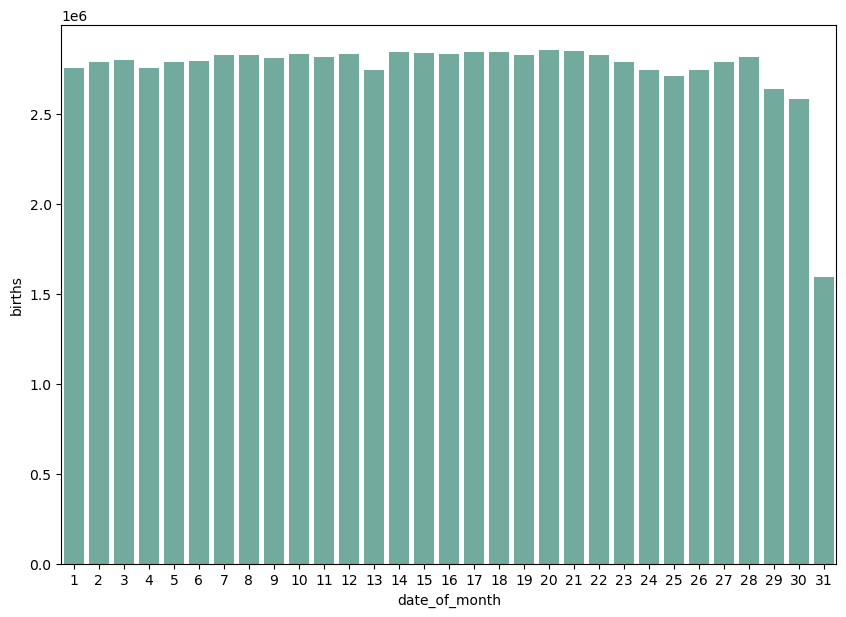

In [38]:
plt.figure(figsize=(10, 7))

sns.barplot(
    data=births_on_day_sorted,
    x="date_of_month", 
    y="births",  
    color='#69b3a2');

# Finding the date with highest amount of births

In [39]:
all_births.sort_values(by='births', ascending=False).head(31)

,year,month,date_of_month,day_of_week,births
5730,2009,September,9,Wednesday,16081
5477,2008,December,30,Tuesday,15645
5108,2007,December,27,Thursday,15590
5109,2007,December,28,Friday,15555
4632,2006,September,7,Thursday,15454
4995,2007,September,5,Wednesday,15440
4631,2006,September,6,Wednesday,15391
5333,2008,August,8,Friday,15374
5101,2007,December,20,Thursday,15214
4644,2006,September,19,Tuesday,15205


# Finding date with lowest amount of births

In [40]:
all_births.sort_values(by='births', ascending=True).head(31)

,year,month,date_of_month,day_of_week,births
6567,2011,December,25,Sunday,5728
6202,2010,December,25,Saturday,6159
5837,2009,December,25,Friday,6160
4376,2005,December,25,Sunday,6224
4011,2004,December,25,Saturday,6259
6933,2012,December,25,Tuesday,6325
4741,2006,December,25,Monday,6409
2915,2001,December,25,Tuesday,6443
5472,2008,December,25,Thursday,6471
6644,2012,March,11,Sunday,6497


# Finding Friday 13th dates

In [41]:
all_births[(all_births['date_of_month'] == 13) & (all_births['day_of_week'] == 'Friday')].sort_values(by='births', ascending=False).head(50)

,year,month,date_of_month,day_of_week,births
4941,2007,July,13,Friday,13228
3177,2002,September,13,Friday,12786
7195,2013,September,13,Friday,12669
4668,2006,October,13,Friday,12628
5277,2008,June,13,Friday,12394
3877,2004,August,13,Friday,12275
4850,2007,April,13,Friday,12168
6768,2012,July,13,Friday,12109
6068,2010,August,13,Friday,12092
5550,2009,March,13,Friday,12087


In [42]:
all_births[(all_births['date_of_month'] == 12) & (all_births['day_of_week'] == 'Thursday')].sort_values(by='births', ascending=False).head(10)

,year,month,date_of_month,day_of_week,births
4940,2007,July,12,Thursday,14115
4667,2006,October,12,Thursday,13985
3176,2002,September,12,Thursday,13982
5276,2008,June,12,Thursday,13796
5521,2009,February,12,Thursday,13635
4849,2007,April,12,Thursday,13609
7194,2013,September,12,Thursday,13460
3876,2004,August,12,Thursday,13448
6067,2010,August,12,Thursday,13365
4394,2006,January,12,Thursday,13309


In [43]:
all_births[(all_births['date_of_month'] == 14) & (all_births['day_of_week'] == 'Saturday')].sort_values(by='births', ascending=False).head(10)

,year,month,date_of_month,day_of_week,births
4942,2007,July,14,Saturday,9327
987,1996,September,14,Saturday,9323
3178,2002,September,14,Saturday,9258
2051,1999,August,14,Saturday,9143
2751,2001,July,14,Saturday,9112
1505,1998,February,14,Saturday,9112
2478,2000,October,14,Saturday,8985
3696,2004,February,14,Saturday,8944
651,1995,October,14,Saturday,8920
378,1995,January,14,Saturday,8887


# Comparing all days of the 13th

In [44]:
births_on_13 = all_births[all_births['date_of_month'] == 13]

In [45]:
births_on_13

,year,month,date_of_month,day_of_week,births
12,1994,January,13,Thursday,11212
43,1994,February,13,Sunday,8171
71,1994,March,13,Sunday,8248
102,1994,April,13,Wednesday,11428
132,1994,May,13,Friday,11085
...,...,...,...,...,...
7529,2014,August,13,Wednesday,12817
7560,2014,September,13,Saturday,8903
7590,2014,October,13,Monday,11241
7621,2014,November,13,Thursday,12103


In [46]:
births_on_13_sorted = births_on_13.groupby('day_of_week')['births'].sum().sort_values(ascending=False).reset_index()

In [47]:
births_on_13_sorted

,day_of_week,births
0,Thursday,465493
1,Tuesday,453031
2,Wednesday,432957
3,Friday,409794
4,Monday,398770
5,Saturday,308329
6,Sunday,278865


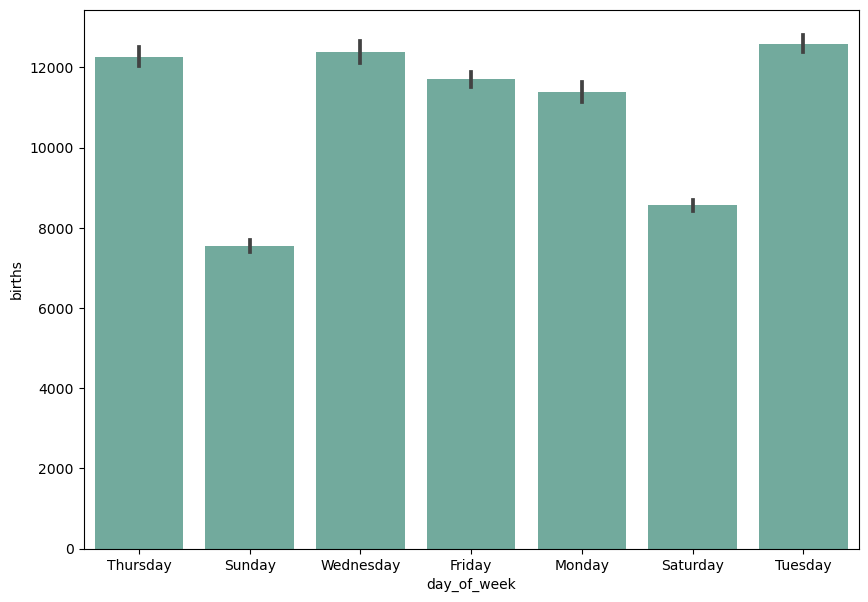

In [48]:
plt.figure(figsize=(10, 7))

sns.barplot(
    data=births_on_13,
    x="day_of_week", 
    y="births",  
    color='#69b3a2');

In [49]:
births_on_13_sorted

,day_of_week,births
0,Thursday,465493
1,Tuesday,453031
2,Wednesday,432957
3,Friday,409794
4,Monday,398770
5,Saturday,308329
6,Sunday,278865


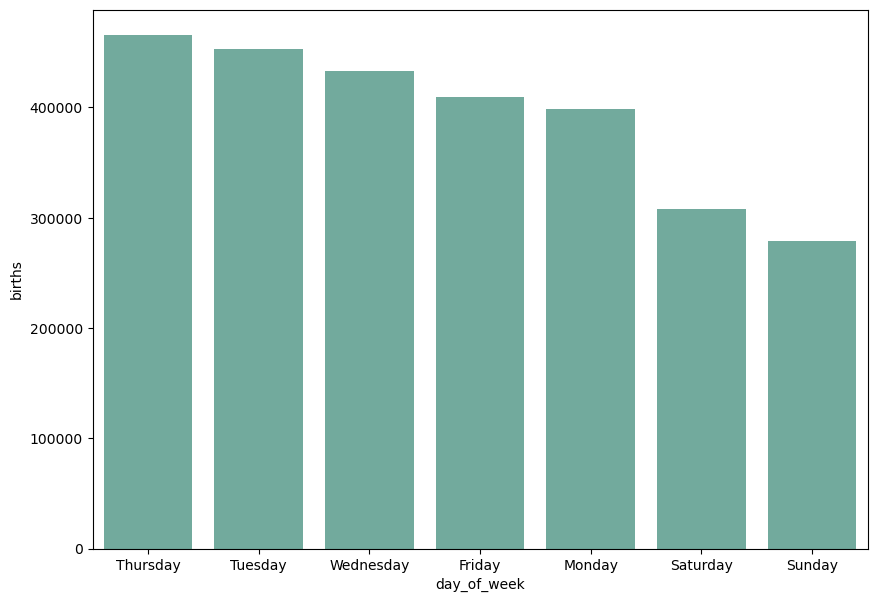

In [50]:
plt.figure(figsize=(10, 7))

sns.barplot(
    data=births_on_13_sorted,
    x="day_of_week", 
    y="births",  
    color='#69b3a2');

# Comparing all years for Christmas Day

In [51]:
all_births[(all_births['date_of_month'] == 25) & (all_births['month'] == 'December')].sort_values(by='births', ascending=False)

,year,month,date_of_month,day_of_week,births
358,1994,December,25,Sunday,7192
1089,1996,December,25,Wednesday,7092
1454,1997,December,25,Thursday,7055
723,1995,December,25,Monday,7027
1819,1998,December,25,Friday,7020
7663,2014,December,25,Thursday,6749
2184,1999,December,25,Saturday,6674
3280,2002,December,25,Wednesday,6629
3645,2003,December,25,Thursday,6628
5106,2007,December,25,Tuesday,6624


# Comparing all years for Valentine's Day

In [52]:
all_births[(all_births['date_of_month'] == 14) & (all_births['month'] == 'February')].sort_values(by='births', ascending=False)

,year,month,date_of_month,day_of_week,births
5157,2008,February,14,Thursday,14207
4427,2006,February,14,Tuesday,13886
4792,2007,February,14,Wednesday,13647
2601,2001,February,14,Wednesday,12890
3331,2003,February,14,Friday,12807
2966,2002,February,14,Thursday,12785
6618,2012,February,14,Tuesday,12708
7349,2014,February,14,Friday,12494
409,1995,February,14,Tuesday,12454
6984,2013,February,14,Thursday,12422


# Comparing all years for April Fool's Day

In [53]:
all_births[(all_births['date_of_month'] == 1) & (all_births['month'] == 'April')].sort_values(by='births', ascending=False)

,year,month,date_of_month,day_of_week,births
5204,2008,April,1,Tuesday,12771
5569,2009,April,1,Wednesday,12247
3743,2004,April,1,Thursday,12138
5934,2010,April,1,Thursday,11994
4108,2005,April,1,Friday,11760
3377,2003,April,1,Tuesday,11754
7395,2014,April,1,Tuesday,11710
1916,1999,April,1,Thursday,11313
6299,2011,April,1,Friday,11264
1551,1998,April,1,Wednesday,10992


# Checking to find matching dates: (11/11/11)

In [54]:
all_births[(all_births['date_of_month'].isin([1, 2])) & (all_births['month'] == 'January') & (all_births['year'] == 2001)]

,year,month,date_of_month,day_of_week,births
2557,2001,January,1,Monday,7437
2558,2001,January,2,Tuesday,10346


In [55]:
all_births[(all_births['date_of_month'].isin([1, 2, 3, 4])) & (all_births['month'] == 'February') & (all_births['year'] == 2002)]

,year,month,date_of_month,day_of_week,births
2953,2002,February,1,Friday,11943
2954,2002,February,2,Saturday,8799
2955,2002,February,3,Sunday,7322
2956,2002,February,4,Monday,11176


In [56]:
all_births[(all_births['date_of_month'].isin([1, 2, 3, 4, 5])) & (all_births['month'] == 'March') & (all_births['year'] == 2003)]

,year,month,date_of_month,day_of_week,births
3346,2003,March,1,Saturday,8500
3347,2003,March,2,Sunday,7438
3348,2003,March,3,Monday,12491
3349,2003,March,4,Tuesday,12638
3350,2003,March,5,Wednesday,12264


In [57]:
all_births[(all_births['date_of_month'].isin([2, 3, 4, 5, 6])) & (all_births['month'] == 'April') & (all_births['year'] == 2004)]

,year,month,date_of_month,day_of_week,births
3744,2004,April,2,Friday,12776
3745,2004,April,3,Saturday,8479
3746,2004,April,4,Sunday,7559
3747,2004,April,5,Monday,12013
3748,2004,April,6,Tuesday,13122


In [58]:
all_births[(all_births['date_of_month'].isin([3, 4, 5, 6, 7])) & (all_births['month'] == 'May') & (all_births['year'] == 2005)]

,year,month,date_of_month,day_of_week,births
4140,2005,May,3,Tuesday,13079
4141,2005,May,4,Wednesday,12841
4142,2005,May,5,Thursday,14357
4143,2005,May,6,Friday,12496
4144,2005,May,7,Saturday,8204


In [59]:
all_births[(all_births['date_of_month'].isin([4, 5, 6, 7, 8])) & (all_births['month'] == 'June') & (all_births['year'] == 2006)]

,year,month,date_of_month,day_of_week,births
4537,2006,June,4,Sunday,7834
4538,2006,June,5,Monday,13004
4539,2006,June,6,Tuesday,11661
4540,2006,June,7,Wednesday,13693
4541,2006,June,8,Thursday,14137


In [60]:
all_births[(all_births['date_of_month'].isin([5, 6, 7, 8, 9])) & (all_births['month'] == 'July') & (all_births['year'] == 2007)]

,year,month,date_of_month,day_of_week,births
4933,2007,July,5,Thursday,13367
4934,2007,July,6,Friday,14143
4935,2007,July,7,Saturday,10499
4936,2007,July,8,Sunday,8322
4937,2007,July,9,Monday,13473


In [61]:
all_births[(all_births['date_of_month'].isin([6, 7, 8, 9, 10])) & (all_births['month'] == 'August') & (all_births['year'] == 2008)]

,year,month,date_of_month,day_of_week,births
5331,2008,August,6,Wednesday,13800
5332,2008,August,7,Thursday,13859
5333,2008,August,8,Friday,15374
5334,2008,August,9,Saturday,9233
5335,2008,August,10,Sunday,7951


In [62]:
all_births[(all_births['date_of_month'].isin([7, 8, 9, 10, 11])) & (all_births['month'] == 'September') & (all_births['year'] == 2009)]

,year,month,date_of_month,day_of_week,births
5728,2009,September,7,Monday,7947
5729,2009,September,8,Tuesday,13555
5730,2009,September,9,Wednesday,16081
5731,2009,September,10,Thursday,14887
5732,2009,September,11,Friday,13032


In [63]:
all_births[(all_births['date_of_month'].isin([8, 9, 10, 11, 12])) & (all_births['month'] == 'October') & (all_births['year'] == 2010)]

,year,month,date_of_month,day_of_week,births
6124,2010,October,8,Friday,12536
6125,2010,October,9,Saturday,8194
6126,2010,October,10,Sunday,8490
6127,2010,October,11,Monday,12134
6128,2010,October,12,Tuesday,12913


In [64]:
all_births[(all_births['date_of_month'].isin([9, 10, 11, 12, 13])) & (all_births['month'] == 'November') & (all_births['year'] == 2011)]

,year,month,date_of_month,day_of_week,births
6521,2011,November,9,Wednesday,11990
6522,2011,November,10,Thursday,11978
6523,2011,November,11,Friday,14392
6524,2011,November,12,Saturday,8087
6525,2011,November,13,Sunday,6877


In [65]:
all_births[(all_births['date_of_month'].isin([10, 11, 12, 13, 14])) & (all_births['month'] == 'December') & (all_births['year'] == 2012)]

,year,month,date_of_month,day_of_week,births
6918,2012,December,10,Monday,11529
6919,2012,December,11,Tuesday,12234
6920,2012,December,12,Wednesday,14667
6921,2012,December,13,Thursday,11893
6922,2012,December,14,Friday,11872


# Finding all Friday 13th dates

In [66]:
all_births[(all_births
            ['date_of_month'].isin([12, 13, 14])) & 
           (all_births['month'].isin(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])) & 
           (all_births['year'].isin([1994, 1995, 19996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014]))]

,year,month,date_of_month,day_of_week,births
11,1994,January,12,Wednesday,11567
12,1994,January,13,Thursday,11212
13,1994,January,14,Friday,11570
42,1994,February,12,Saturday,8945
43,1994,February,13,Sunday,8171
...,...,...,...,...,...
7621,2014,November,13,Thursday,12103
7622,2014,November,14,Friday,12234
7650,2014,December,12,Friday,12001
7651,2014,December,13,Saturday,8596


In [67]:
filtered_weekdays = all_births[~all_births['day_of_week'].isin(['Saturday', 'Sunday'])]

In [68]:
filtered_weekdays

,year,month,date_of_month,day_of_week,births
2,1994,January,3,Monday,10142
3,1994,January,4,Tuesday,11248
4,1994,January,5,Wednesday,11053
5,1994,January,6,Thursday,11406
6,1994,January,7,Friday,11251
...,...,...,...,...,...
7663,2014,December,25,Thursday,6749
7664,2014,December,26,Friday,10386
7667,2014,December,29,Monday,12811
7668,2014,December,30,Tuesday,13634


In [69]:
filtered_weekdays[(filtered_weekdays['date_of_month'].isin([12, 13, 14])) & 
           (filtered_weekdays['month'].isin(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])) & 
           (filtered_weekdays['year'].isin([1994, 1995, 19996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014]))]

,year,month,date_of_month,day_of_week,births
11,1994,January,12,Wednesday,11567
12,1994,January,13,Thursday,11212
13,1994,January,14,Friday,11570
44,1994,February,14,Monday,11551
72,1994,March,14,Monday,11092
...,...,...,...,...,...
7591,2014,October,14,Tuesday,12658
7620,2014,November,12,Wednesday,12244
7621,2014,November,13,Thursday,12103
7622,2014,November,14,Friday,12234


In [70]:
twice_filtered_weekdays = filtered_weekdays[(filtered_weekdays['date_of_month'].isin([12, 13, 14])) & 
           (filtered_weekdays['month'].isin(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])) & 
           (filtered_weekdays['year'].isin([1994, 1995, 19996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014]))]

In [71]:
twice_filtered_weekdays[twice_filtered_weekdays['date_of_month'].isin([12, 13, 14])]

,year,month,date_of_month,day_of_week,births
11,1994,January,12,Wednesday,11567
12,1994,January,13,Thursday,11212
13,1994,January,14,Friday,11570
44,1994,February,14,Monday,11551
72,1994,March,14,Monday,11092
...,...,...,...,...,...
7591,2014,October,14,Tuesday,12658
7620,2014,November,12,Wednesday,12244
7621,2014,November,13,Thursday,12103
7622,2014,November,14,Friday,12234


In [72]:
twice_filtered_group = twice_filtered_weekdays.groupby(['year', 'month'])

In [73]:
final_filtered_weekdays = twice_filtered_group.filter(lambda x: set(x['date_of_month']) == {12, 13, 14})

In [74]:
final_filtered_weekdays.head(30)

,year,month,date_of_month,day_of_week,births
11,1994,January,12,Wednesday,11567
12,1994,January,13,Thursday,11212
13,1994,January,14,Friday,11570
101,1994,April,12,Tuesday,12146
102,1994,April,13,Wednesday,11428
103,1994,April,14,Thursday,11709
192,1994,July,12,Tuesday,12507
193,1994,July,13,Wednesday,12134
194,1994,July,14,Thursday,12485
254,1994,September,12,Monday,11500


In [75]:
final_filtered_weekdays.groupby('date_of_month')['births'].sum().sort_values(ascending=False).reset_index()

,date_of_month,births
0,14,1319039
1,12,1301846
2,13,1293828


In [76]:
final_filtered_weekdays_sum = final_filtered_weekdays.groupby('date_of_month')['births'].sum().sort_values(ascending=False).reset_index()

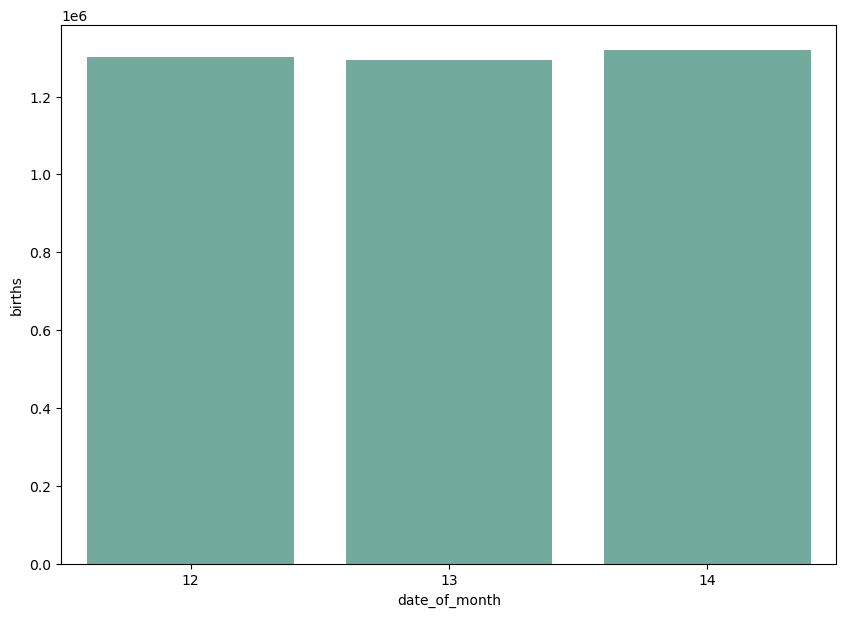

In [77]:
plt.figure(figsize=(10, 7))

sns.barplot(
    data=final_filtered_weekdays_sum,
    x="date_of_month", 
    y="births",  
    color='#69b3a2');

In [78]:
final_filtered_weekdays['births'].sum()

3914713

In [ ]:
shortened_year_column = all_births['year'] % 100

In [ ]:
shortened_year_column

In [ ]:
all_births

In [ ]:
all_births_copy = all_births

In [ ]:
all_births_copy.head()

In [ ]:
all_births_copy['date_of_month'] = all_births_copy['date_of_month'].astype(str).str.zfill(2)
all_births_copy['year'] = all_births_copy['year'].astype(str).str[-2:] 

In [ ]:
all_births_copy

In [ ]:
replaced_months_copy = {
    "January": "01",
    "February": "02",
    "March": "03",
    "April": "04",
    "May": "05",
    "June": "06",
    "July": "07",
    "August": "08",
    "September": "09",
    "October": "10",
    "November": "11",
    "December": "12"
}

In [ ]:
all_births_copy['month'] = all_births_copy['month'].replace(replaced_months_copy)

In [ ]:
all_births_copy

In [ ]:
def perfect_match(row):
    date= '/'.join([row['date_of_month'], row['month'], row['year']])
    return

In [ ]:
all_births_copy[all_births_copy.apply(perfect_match, axis=1)]

In [ ]:
start_year = '01'
end_year = '12'
perfect_matches = []

In [ ]:
start_year = '01'
end_year = '12'
perfect_matches = []

for year in range(start_year, end_year + 1):
    target_date = {'date_of_month': year, 'month': year, 'year': year}  # Generating the target date dynamically
    matches = all_births_copy[all_births_copy.apply(lambda row: all(row[column] == target_date[column] for column in target_date), axis=1)]
    if not matches.empty:
        all_matches.append(matches)

In [ ]:
all_births_copy.info()